#Importar ibrerias

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
from ipywidgets import FileUpload

#Cargar el archivo

In [ ]:
# Cargar el archivo directamente desde el directorio donde está el notebook
nombre_archivo = 'mayo_2024.xlsx'  # Puedes cambiar este nombre por el archivo que quieras cargar
data = pd.read_excel(nombre_archivo)

# Validar los datos
data.head()

In [12]:
'''Para usarlo en google_Colab de Google'''
# from google.colab import drive
# drive.mount('/content/drive')
# ruta = "/content/drive/MyDrive/OFOSI/PROPUESTA_EFICIENCIA/julio_2024.xlsx"# Puedes cambiar esto por el nombre del archivo cargado
# data = pd.read_excel(ruta)
# data.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Zona,Sede,Turno,Taquilla,Funcionario,Grupo,Tiempo de espera (hh:mm:ss),Tiempo de atención (hh:mm:ss),Fecha de impresión,Fecha de llamado,...,Fin Servicio,Tiempo Servicio,Numero de Asignación,Abandonado,Nombre del Cliente,Identificacion del Cliente,IdTurno,IdServicio,IdSede,IdTurnoServicio
0,Regional Cúcuta,TRANSACIONES RAPIDAS,1,TR SEVILLA,THALIA CORAYMA PEREZ DAVILA,Transacciones rápidas,00:00:00,00:00:02,2024-07-02 06:02:06,2024-07-02 06:02:06,...,06:02:08,00:00:02,NaN,NO,GENERICO,SIN CEDULA,2337233,559,51,2411957
1,Regional Cúcuta,SEVILLA,G1,2,ALVARO ALEXIS LEON ROJAS,Atención General,00:00:02,00:48:40,2024-07-02 06:03:18,2024-07-02 06:03:20,...,06:34:39,00:31:19,NaN,NO,WILSON DEMOYA RIVERA,13473534,2337234,24,2,2411962
2,Regional Cúcuta,SEVILLA,G1,2,ALVARO ALEXIS LEON ROJAS,Atención General,00:00:00,00:48:40,2024-07-02 06:03:18,2024-07-02 06:03:20,...,06:52:00,00:17:21,NaN,NO,WILSON DEMOYA RIVERA,13473534,2337234,28,2,2411972
3,Regional Cúcuta,TRANSACIONES RAPIDAS,2,TR SEVILLA,THALIA CORAYMA PEREZ DAVILA,Transacciones rápidas,00:00:00,00:00:02,2024-07-02 06:03:49,2024-07-02 06:03:49,...,06:03:51,00:00:02,NaN,NO,GENERICO,SIN CEDULA,2337235,562,51,2411958
4,Regional Cúcuta,SEVILLA,F1,7,LEIDY VIVIANA BERBESI ARDILA,Financiación,00:00:01,00:31:53,2024-07-02 06:04:20,2024-07-02 06:04:21,...,06:28:34,00:24:13,NaN,NO,TEODORO GELVEZ SANTAMARIA,13505710,2337236,28,2,2411964


#Validar los datos

In [13]:
data.shape #Conocer las dimensiones de la data, FilasxColumnsa

(39733, 24)

In [14]:
data = data.rename(columns={'Tiempo de espera (hh:mm:ss)' : 'Tiempo de espera',
                            'Tiempo de atención (hh:mm:ss)' : 'Tiempo de atencion'})
print(data.columns)
print(f'La cantidad de datos inicial es de {len(data)}')

Index(['Zona', 'Sede', 'Turno', 'Taquilla', 'Funcionario', 'Grupo',
       'Tiempo de espera', 'Tiempo de atencion', 'Fecha de impresión',
       'Fecha de llamado', 'Fecha de atención', 'Hora de Impresion',
       'Servicio', 'Inicio Servicio', 'Fin Servicio', 'Tiempo Servicio',
       'Numero de Asignación', 'Abandonado', 'Nombre del Cliente',
       'Identificacion del Cliente', 'IdTurno', 'IdServicio', 'IdSede',
       'IdTurnoServicio'],
      dtype='object')
La cantidad de datos inicial es de 39733


In [15]:
#Se convierte en Df y se eliminan los turnos de Pruebas, y del grupo Veolia que no corresponden
data_cens_df = pd.DataFrame(data)
data_cens_df = data_cens_df[data_cens_df['Sede'] != 'PRUEBAS']
data_cens_df = data_cens_df[~(data_cens_df['Grupo'] == 'Veolia')]
data_cens_df = data_cens_df[~(data_cens_df['Grupo'] == 'Veolia Priorotario')]
data_cens_df = data_cens_df[~(data_cens_df['Grupo'] == 'Gases')]
data_cens_df = data_cens_df[~(data_cens_df['Grupo'] == 'Aseo Urbano')]

In [16]:
#Validar valores nulos
valores_nulos = pd.DataFrame(data_cens_df
                 .isnull()
                 .sum())
valores_nulos

,0
Zona,0
Sede,0
Turno,0
Taquilla,0
Funcionario,0
Grupo,0
Tiempo de espera,0
Tiempo de atencion,0
Fecha de impresión,0
Fecha de llamado,0


In [17]:
#Se eliminan las columnas con nulos significataivos, y eliminan servicios
data_cens_df = data_cens_df.drop(['Numero de Asignación'], axis=1) #Eliminar la columna vacia con NAN
data_cens_df = data_cens_df.drop_duplicates(subset=['IdTurno']) #Eliminar servicios, dejando solo turnos unicos
data_cens_df.shape #Mostrar las nuevas filas x columnas

(33117, 23)

In [18]:
columnas_con_nulos = ['Zona', 'Sede', 'Turno', 'Taquilla', 'Funcionario', 'Grupo',
                      'Tiempo de espera', 'Tiempo de atencion', 'Fecha de impresión',
                      'Fecha de llamado', 'Fecha de atención', 'Hora de Impresion',
                      'Abandonado', 'Nombre del Cliente', 'Identificacion del Cliente',
                      'IdTurno', 'IdServicio', 'IdSede', 'IdTurnoServicio']

# Eliminar las filas que tienen valores nulos en las columnas especificadas
data_cens_df = data_cens_df.dropna(subset=columnas_con_nulos)

In [19]:
valores_nulos = pd.DataFrame(data_cens_df.isnull().sum())
print(valores_nulos)

                               0
Zona                           0
Sede                           0
Turno                          0
Taquilla                       0
Funcionario                    0
Grupo                          0
Tiempo de espera               0
Tiempo de atencion             0
Fecha de impresión             0
Fecha de llamado               0
Fecha de atención              0
Hora de Impresion              0
Servicio                    1587
Inicio Servicio             1587
Fin Servicio                1587
Tiempo Servicio             1587
Abandonado                     0
Nombre del Cliente             0
Identificacion del Cliente     0
IdTurno                        0
IdServicio                     0
IdSede                         0
IdTurnoServicio                0


In [20]:
columnas_con_nulos = ['Zona', 'Sede', 'Turno', 'Taquilla', 'Funcionario', 'Grupo',
                      'Tiempo de espera', 'Tiempo de atencion', 'Fecha de impresión',
                      'Fecha de llamado', 'Fecha de atención', 'Hora de Impresion',
                      'Abandonado', 'Nombre del Cliente', 'Identificacion del Cliente',
                      'IdTurno', 'IdServicio', 'IdSede', 'IdTurnoServicio']

# Eliminar las filas que tienen valores nulos en las columnas especificadas
data_cens_df = data_cens_df.dropna(subset=columnas_con_nulos)

In [21]:
valores_nulos = pd.DataFrame(data_cens_df.isnull().sum())
print(valores_nulos)

                               0
Zona                           0
Sede                           0
Turno                          0
Taquilla                       0
Funcionario                    0
Grupo                          0
Tiempo de espera               0
Tiempo de atencion             0
Fecha de impresión             0
Fecha de llamado               0
Fecha de atención              0
Hora de Impresion              0
Servicio                    1587
Inicio Servicio             1587
Fin Servicio                1587
Tiempo Servicio             1587
Abandonado                     0
Nombre del Cliente             0
Identificacion del Cliente     0
IdTurno                        0
IdServicio                     0
IdSede                         0
IdTurnoServicio                0


In [22]:
print(f'La cantidad de datos inicial es de {len(data_cens_df)}')

La cantidad de datos inicial es de 33117


In [23]:
# Convertir hh:mm:ss a minutos para la columna 'Tiempo de espera'
data_cens_df['Tiempo de espera'] = data_cens_df['Tiempo de espera'].astype(str).apply(
    lambda x: int(x.split(':')[0]) * 60 + int(x.split(':')[1]) + int(x.split(':')[2]) / 60
)
data_cens_df.head()

,Zona,Sede,Turno,Taquilla,Funcionario,Grupo,Tiempo de espera,Tiempo de atencion,Fecha de impresión,Fecha de llamado,...,Inicio Servicio,Fin Servicio,Tiempo Servicio,Abandonado,Nombre del Cliente,Identificacion del Cliente,IdTurno,IdServicio,IdSede,IdTurnoServicio
0,Regional Cúcuta,TRANSACIONES RAPIDAS,1,TR SEVILLA,THALIA CORAYMA PEREZ DAVILA,Transacciones rápidas,0.000000,00:00:02,2024-07-02 06:02:06,2024-07-02 06:02:06,...,06:02:06,06:02:08,00:00:02,NO,GENERICO,SIN CEDULA,2337233,559,51,2411957
1,Regional Cúcuta,SEVILLA,G1,2,ALVARO ALEXIS LEON ROJAS,Atención General,0.033333,00:48:40,2024-07-02 06:03:18,2024-07-02 06:03:20,...,06:03:20,06:34:39,00:31:19,NO,WILSON DEMOYA RIVERA,13473534,2337234,24,2,2411962
3,Regional Cúcuta,TRANSACIONES RAPIDAS,2,TR SEVILLA,THALIA CORAYMA PEREZ DAVILA,Transacciones rápidas,0.000000,00:00:02,2024-07-02 06:03:49,2024-07-02 06:03:49,...,06:03:49,06:03:51,00:00:02,NO,GENERICO,SIN CEDULA,2337235,562,51,2411958
4,Regional Cúcuta,SEVILLA,F1,7,LEIDY VIVIANA BERBESI ARDILA,Financiación,0.016667,00:31:53,2024-07-02 06:04:20,2024-07-02 06:04:21,...,06:04:21,06:28:34,00:24:13,NO,TEODORO GELVEZ SANTAMARIA,13505710,2337236,28,2,2411964
6,Regional Cúcuta,TRANSACIONES RAPIDAS,3,TR SEVILLA,THALIA CORAYMA PEREZ DAVILA,Transacciones rápidas,0.000000,00:00:02,2024-07-02 06:07:56,2024-07-02 06:07:56,...,06:07:56,06:07:58,00:00:02,NO,GENERICO,SIN CEDULA,2337237,561,51,2411959


In [24]:
#Convertir la columna fecha impresión a formato fecha y hora
columnas_a_transformar = ['Fecha de impresión', 'Fecha de llamado', 'Fecha de atención']

data_cens_df[columnas_a_transformar] = data_cens_df[columnas_a_transformar].apply(lambda x: pd.to_datetime(x, format='%Y-%m-%d %H:%M:%S', errors='coerce'))

# Mapeo de días de la semana de inglés a español
dias_español = {
    'Monday': 'Lunes',
    'Tuesday': 'Martes',
    'Wednesday': 'Miércoles',
    'Thursday': 'Jueves',
    'Friday': 'Viernes',
    'Saturday': 'Sábado',
    'Sunday': 'Domingo'
}

#Extraer semana, mes, año, mes-año, dia del mes
data_cens_df['Año'] = data_cens_df['Fecha de impresión'].dt.year
data_cens_df['Mes'] = data_cens_df['Fecha de impresión'].dt.month
data_cens_df['Año-Mes'] = data_cens_df['Fecha de impresión'].dt.strftime('%Y-%m')
data_cens_df['Año-Mes-Dia'] = data_cens_df['Fecha de impresión'].dt.strftime('%Y-%m-%d')
data_cens_df['Semana del Año'] = data_cens_df['Fecha de impresión'].dt.isocalendar().week
data_cens_df['Dia_Del_mes'] = data_cens_df['Fecha de impresión'].dt.day

#Extraer día de la semana y hora
data_cens_df['Dia de la semana'] = data_cens_df['Fecha de impresión'].dt.day_name().map(dias_español)
data_cens_df['Hora'] = data_cens_df['Fecha de impresión'].dt.hour

data_cens_df.head()

,Zona,Sede,Turno,Taquilla,Funcionario,Grupo,Tiempo de espera,Tiempo de atencion,Fecha de impresión,Fecha de llamado,...,IdSede,IdTurnoServicio,Año,Mes,Año-Mes,Año-Mes-Dia,Semana del Año,Dia_Del_mes,Dia de la semana,Hora
0,Regional Cúcuta,TRANSACIONES RAPIDAS,1,TR SEVILLA,THALIA CORAYMA PEREZ DAVILA,Transacciones rápidas,0.000000,00:00:02,2024-07-02 06:02:06,2024-07-02 06:02:06,...,51,2411957,2024,7,2024-07,2024-07-02,27,2,Martes,6
1,Regional Cúcuta,SEVILLA,G1,2,ALVARO ALEXIS LEON ROJAS,Atención General,0.033333,00:48:40,2024-07-02 06:03:18,2024-07-02 06:03:20,...,2,2411962,2024,7,2024-07,2024-07-02,27,2,Martes,6
3,Regional Cúcuta,TRANSACIONES RAPIDAS,2,TR SEVILLA,THALIA CORAYMA PEREZ DAVILA,Transacciones rápidas,0.000000,00:00:02,2024-07-02 06:03:49,2024-07-02 06:03:49,...,51,2411958,2024,7,2024-07,2024-07-02,27,2,Martes,6
4,Regional Cúcuta,SEVILLA,F1,7,LEIDY VIVIANA BERBESI ARDILA,Financiación,0.016667,00:31:53,2024-07-02 06:04:20,2024-07-02 06:04:21,...,2,2411964,2024,7,2024-07,2024-07-02,27,2,Martes,6
6,Regional Cúcuta,TRANSACIONES RAPIDAS,3,TR SEVILLA,THALIA CORAYMA PEREZ DAVILA,Transacciones rápidas,0.000000,00:00:02,2024-07-02 06:07:56,2024-07-02 06:07:56,...,51,2411959,2024,7,2024-07,2024-07-02,27,2,Martes,6


In [46]:
data_cens_df.shape

(33117, 31)

In [25]:
data_cens_df['Grupo'].value_counts()

Grupo
Atención General                    22581
Transacciones rápidas                2269
Asesor Virtual_Todos LosTrámites     2109
Atención Prioritaria                 2008
Financiación                         1737
Asesor Virtual_Constructor            742
Abonos                                713
Vinculaciones                         334
Constructoras                         297
Ofertas                               157
Notificaciones                        110
Atencion General Gramalote             36
Atenciones Generales APP               22
Constructoras APP                       2
Name: count, dtype: int64

#Conteo de turnos por delante

In [26]:
def calcular_turnos_esperando(df):
    # Convertir las columnas de fechas a formato datetime
    df['Fecha de impresión'] = pd.to_datetime(df['Fecha de impresión'])
    df['Fecha de llamado'] = pd.to_datetime(df['Fecha de llamado'])

    # Ordenar el DataFrame por Sede y Fecha de impresión
    df = df.sort_values(by=['Sede', 'Fecha de impresión'])

    # Lista para almacenar el número de turnos esperando
    turnos_esperando = []

    # Iterar sobre cada fila del DataFrame
    for i, row in df.iterrows():
        # Filtrar el DataFrame para encontrar los turnos que estaban esperando antes del turno actual
        esperando = df[(df['Sede'] == row['Sede']) &  # Misma sede
                       (df['Fecha de impresión'] < row['Fecha de impresión']) &  # Turnos generados antes del actual
                       (df['Fecha de llamado'] > row['Fecha de impresión'])].shape[0]  # Turnos que todavía no han sido llamados

        # Añadir el número de turnos esperando a la lista
        turnos_esperando.append(esperando)

        '''Se puede eliminar el # para que al ejecutarse se vaya mostrando como se itera'''
        # print(f"Sede: {row['Sede']}, Fecha de impresión: {row['Fecha de impresión']}, Fecha de llamado: {row['Fecha de llamado']}, Esperando: {esperando}")

    # Añadir la nueva columna 'Turnos_Esperando' al DataFrame original
    df['Turnos_Esperando'] = turnos_esperando

    return df

# Calcular turnos esperando para el DataFrame completo
data_procesada = calcular_turnos_esperando(data_cens_df)

# Guardar el DataFrame procesado si es necesario
# data_turnos_unicos_procesado.to_pickle('/content/drive/MyDrive/OFOSI/PROPUESTA_EFICIENCIA/Analisis/data_turnos_unicos_procesado.pkl')

print("Procesamiento completo.")

Procesamiento completo.


#Clasificación por grupos

##Grupos x Sedes

In [27]:
#Propuesta 1
grupo_1_p1 = ['R. AGUACHICA', 'CAC ATALAYA', 'R. OCAÑA']

grupo_2_p1 = ['CENTRO', 'LOC. EL ZULIA', 'R. PAMPLONA', 'CAC LOS PATIOS', 'CAC LA LIBERTAD', 'CAC VILLA DEL ROSARIO', 'R. TIBÚ']

localidades = ['LOC. ABREGO', 'LOC. ARBOLEDAS',
       'LOC. BOCHALEMA', 'LOC. BUCARASICA', 'LOC. CACHIRA', 'LOC. CACOTA',
       'LOC. CAMPO DOS', 'LOC. CHINACOTA', 'LOC. CHITAGA',
       'LOC. CONVENCIÓN', 'LOC. CUCUTILLA', 'LOC. DURANIA',
       'LOC. EL CARMEN', 'LOC. EL TARRA', 'LOC. GAMARRA',
       'LOC. GONZALEZ', 'LOC. HACARÍ', 'LOC. HERRAN', 'LOC. LA GABARRA',
       'LOC. LA PLAYA', 'LOC. LABATECA', 'LOC. LOURDES', 'LOC. MORALES',
       'LOC. MUTISCUA', 'LOC. PAMPLONITA', 'LOC. PELAYA',
       'LOC. PTO SANTANDER', 'LOC. RAGONVALIA', 'LOC. RIO DE ORO',
       'LOC. SALAZAR', 'LOC. SAN CALIXTO', 'LOC. SAN CAYETANO',
       'LOC. SANTIAGO', 'LOC. SARDINATA', 'LOC. SILOS', 'LOC. TEORAMA',
       'LOC. TOLEDO', 'LOC. VILLA CARO', 'MOVIL 1 (335)', 'MOVIL 2 (338)', 'TIBU MOVIL']

grupo_1_p2 = ['R. AGUACHICA', 'CAC ATALAYA', 'R. OCAÑA','CENTRO', 'LOC. EL ZULIA', 'R. PAMPLONA', 'CAC LOS PATIOS', 'CAC LA LIBERTAD', 'CAC VILLA DEL ROSARIO', 'R. TIBÚ']


In [28]:
data_procesada['Tipo'] = data_procesada['Grupo'].apply(lambda x : 'Prioritario' if x == 'Atención Prioritaria' else 'No prioritario')
data_procesada['Tipo'].value_counts()

Tipo
No prioritario    31109
Prioritario        2008
Name: count, dtype: int64

###Propuesta 1

In [29]:
#Clasificación de grupos
#Columna clasificación P1
def clasificar_grupo(row):
    if row['Sede'] == 'SEVILLA':
        if row['Tipo'] == 'Prioritario':
            return 'Sevilla_P'
        else:
            return 'Sevilla_NP'
    elif row['Grupo'] == 'Transacciones rápidas':
        return 'Transacciones_Rapidas'
    elif row['Sede'] in grupo_1_p1:
        if row['Tipo'] == 'Prioritario':
            return 'grupo_1_P'
        else:
            return 'grupo_1_NP'
    elif row['Sede'] in grupo_2_p1:
        if row['Tipo'] == 'Prioritario':
            return 'grupo_2_P'
        else:
            return 'grupo_2_NP'
    elif row['Sede'] in localidades:
        return 'localidades'
    elif row['Grupo'] == 'Atencion General Gramalote':
        return 'Gramalote'
    elif row['Sede'] == 'SEDE_VIRTUAL':
        if row['Grupo'] == 'Asesor Virtual_Constructor':
            return 'Virtual_Constructor'
        elif row['Grupo'] == 'Asesor Virtual_Todos LosTrámites':
            return 'Virtual_Tramites'
    else:
        return 'localidades'

# Aplicar la función de clasificación al DataFrame
data_procesada['Clasificacion_P1'] = data_procesada.apply(clasificar_grupo, axis=1)
data_procesada['Clasificacion_P1'].value_counts()

Clasificacion_P1
grupo_2_NP               9686
grupo_1_NP               6220
localidades              6131
Sevilla_NP               4040
Transacciones_Rapidas    2269
Virtual_Tramites         2109
grupo_1_P                 788
grupo_2_P                 781
Virtual_Constructor       742
Sevilla_P                 315
Gramalote                  36
Name: count, dtype: int64

###Propuesta 2

In [30]:
#Clasificación de grupos
#Columna clasificación P2
def clasificar_grupo(row):
    if row['Sede'] == 'SEVILLA':
        if row['Tipo'] == 'Prioritario':
            return 'Sevilla_P'
        else:
            return 'Sevilla_NP'
    elif row['Grupo'] == 'Transacciones rápidas':
        return 'Transacciones_Rapidas'
    elif row['Sede'] in grupo_1_p2:
        if row['Tipo'] == 'Prioritario':
            return 'grupo_1_P'
        else:
            return 'grupo_1_NP'
    elif row['Sede'] in localidades:
        return 'localidades'
    elif row['Grupo'] == 'Atencion General Gramalote':
        return 'Gramalote'
    elif row['Sede'] == 'SEDE_VIRTUAL':
        if row['Grupo'] == 'Asesor Virtual_Constructor':
            return 'Virtual_Constructor'
        elif row['Grupo'] == 'Asesor Virtual_Todos LosTrámites':
            return 'Virtual_Tramites'
    else:
        return 'localidades'

# Aplicar la función de clasificación al DataFrame
data_procesada['Clasificacion_P2'] = data_procesada.apply(clasificar_grupo, axis=1)
data_procesada['Clasificacion_P2'].value_counts()

Clasificacion_P2
grupo_1_NP               15906
localidades               6131
Sevilla_NP                4040
Transacciones_Rapidas     2269
Virtual_Tramites          2109
grupo_1_P                 1569
Virtual_Constructor        742
Sevilla_P                  315
Gramalote                   36
Name: count, dtype: int64

##Grupos x Arribos

In [31]:
grupo_1_arribos = ['SEVILLA']
grupo_2_arribos = ['R. AGUACHICA', 'SEDE_VIRTUAL', 'R. OCAÑA']
grupo_3_arribos = ['CENTRO', 'CAC ATALAYA', 'R. PAMPLONA', 'CAC LOS PATIOS', 'CAC LA LIBERTAD', 'CAC VILLA DEL ROSARIO', 'R. TIBÚ']
grupo_4_arribos = ['LOC. EL ZULIA', 'LOC. CHINACOTA', 'LOC. GAMARRA', 'LOC. EL TARRA', 'LOC. ABREGO', 'LOC. MORALES', 'LOC. PTO SANTANDER', 'LOC. PELAYA', 'LOC. CONVENCIÓN', 'MOVIL 2 (338)', 'MOVIL 1 (335)', 'LOC. CACHIRA', 'LOC. EL CARMEN', 'LOC. TOLEDO', 'LOC. SARDINATA', 'LOC. RAGONVALIA', 'LOC. VILLA CARO', 'LOC. CHITAGA', 'LOC. HERRAN', 'LOC. LABATECA', 'LOC. SALAZAR', 'LOC. LA GABARRA', 'LOC. CAMPO DOS', 'LOC. TEORAMA', 'LOC. LOURDES', 'LOC. RIO DE ORO', 'LOC. LA PLAYA', 'LOC. CUCUTILLA', 'LOC. ARBOLEDAS', 'LOC. HACARÃ\x8d', 'LOC. SAN CALIXTO', 'LOC. SAN CAYETANO', 'LOC. DURANIA', 'LOC. BOCHALEMA', 'LOC. SANTIAGO', 'LOC. CACOTA', 'LOC. GONZALEZ', 'LOC. MUTISCUA', 'LOC. SILOS', 'LOC. BUCARASICA', 'LOC. PAMPLONITA', 'AGUACHICA MOVIL', 'TIBU MOVIL']

In [32]:
data_procesada['Grupo'].value_counts()

Grupo
Atención General                    22581
Transacciones rápidas                2269
Asesor Virtual_Todos LosTrámites     2109
Atención Prioritaria                 2008
Financiación                         1737
Asesor Virtual_Constructor            742
Abonos                                713
Vinculaciones                         334
Constructoras                         297
Ofertas                               157
Notificaciones                        110
Atencion General Gramalote             36
Atenciones Generales APP               22
Constructoras APP                       2
Name: count, dtype: int64

#Indicador Eficiencia

##Indicador actual

In [33]:
tipos_de_grupos = data_procesada['Grupo'].unique()
sedes_a_evaluar = data_procesada['Sede'].unique()

umbral_x_grupo2 = {'Financiación' : 15, 'Atención General' : 15, 'Vinculaciones' : 20,
       'Constructoras' : 20, 'Asesor Virtual_Constructor' : 60,
       'Asesor Virtual_Todos LosTrámites' : 20, 'Atención Prioritaria' : 15, 'Notificaciones' : 15,
       'Atenciones Generales APP' : 15, 'Abonos' : 15, 'Atencion General Gramalote' : 20,
       'Constructoras APP' : 20, 'Ofertas' : 15, 'Vinculaciones APP' : 20, 'Transacciones rápidas' : 10}

total_turnos_debajo_umbral = 0
total_turnos_mes = 0
resultados = {}

for sede in sedes_a_evaluar:
  data_a_evaluar = data_procesada[data_procesada['Sede']==sede]
  turnos_sede = len(data_a_evaluar)
  turnos_debajo_umbral = 0
  turnos_fuera_umbral = 0

  for turno in data_a_evaluar['IdTurno'].unique(): #solo turnos unicos en el sede actual
    turno_a_evaluar = data_a_evaluar[data_a_evaluar['IdTurno']==turno]
    grupo_turno =  turno_a_evaluar['Grupo'].iloc[0] #Obtiene el grupo del turno
    tiempo_de_espera = turno_a_evaluar['Tiempo de espera'].iloc[0] #Obtiene el tiempo de espera del turno
    umbral = umbral_x_grupo2[grupo_turno] #Obtener el umbral actual de ese grupo

    if tiempo_de_espera <= umbral:
      turnos_debajo_umbral += 1
    else:
      turnos_fuera_umbral += 1


  indicador2 = (turnos_debajo_umbral / turnos_sede) * 100
  total_turnos_debajo_umbral += turnos_debajo_umbral
  total_turnos_mes += turnos_sede
  resultados[sede] = indicador2
  print(f'El indicador de eficacia en el periodo de {sede} resultó en {indicador2}%')

  # Calcular el indicador total
indicador_total = (total_turnos_debajo_umbral / total_turnos_mes) * 100
print(f'El indicador total de eficacia resultó en {indicador_total}%')

El indicador de eficacia en el periodo de CAC ATALAYA resultó en 46.82642487046632%
El indicador de eficacia en el periodo de CAC LA LIBERTAD resultó en 65.3876898481215%
El indicador de eficacia en el periodo de CAC LOS PATIOS resultó en 42.43161094224924%
El indicador de eficacia en el periodo de CAC VILLA DEL ROSARIO resultó en 22.1681723419041%
El indicador de eficacia en el periodo de CENTRO resultó en 28.62086010874938%
El indicador de eficacia en el periodo de LOC. ABREGO resultó en 80.71065989847716%
El indicador de eficacia en el periodo de LOC. ARBOLEDAS resultó en 95.1219512195122%
El indicador de eficacia en el periodo de LOC. BOCHALEMA resultó en 100.0%
El indicador de eficacia en el periodo de LOC. BUCARASICA resultó en 100.0%
El indicador de eficacia en el periodo de LOC. CACHIRA resultó en 92.17391304347827%
El indicador de eficacia en el periodo de LOC. CACOTA resultó en 100.0%
El indicador de eficacia en el periodo de LOC. CAMPO DOS resultó en 95.0%
El indicador de ef

##Propuesta 1

In [34]:
# Definir los umbrales según la cantidad de turnos esperando
sedes_a_evaluar = list(data_procesada['Sede'].unique())

umbrales = {
    'grupo_1_P': {'baja': 15, 'alta': 20},
    'grupo_2_P': {'baja': 15, 'alta': 15},
    'localidades': 15,
    'Sevilla_P': {'baja': 20, 'alta': 25},
    'grupo_1_NP': {'baja': 20, 'alta': 25},
    'grupo_2_NP': {'baja': 15, 'alta': 20},
    'Sevilla_NP': {'baja': 25, 'alta': 30},
    'Transacciones_Rapidas': 10,
    'Virtual_Tramites': {'baja': 20, 'alta': 25},
    'Virtual_Constructor': {'baja': 45, 'alta': 60},
    'Gramalote': 10
}

condicion_arribos = {
    'grupo_1': {'baja': 19, 'alta': 39},
    'grupo_2': {'baja': 9, 'alta': 19},
    'grupo_3': {'baja': 7, 'alta': 18},
    'grupo_4': {'baja': 5, 'alta': 10}
}

def determinar_umbral(grupo, sede, tipo, turnos_esperando):
    if grupo == 'Transacciones_Rapidas':
        return umbrales['Transacciones_Rapidas']
    elif grupo == 'Gramalote':
        return umbrales['Gramalote']
    if grupo in 'localidades':
        return umbrales['localidades']

    if grupo == 'Sevilla_NP' or grupo == 'Sevilla_P':
        if turnos_esperando < 20:
            return umbrales[grupo]['baja']
        elif turnos_esperando <= 39:
            return umbrales[grupo]['alta']
        else:
            return float('inf')  # Excepción, no cuenta para el umbral

    if grupo == 'Virtual_Constructor' or grupo == 'Virtual_Tramites':
        if turnos_esperando < 10:
            return umbrales[grupo]['baja']
        elif turnos_esperando <= 19:
            return umbrales[grupo]['alta']
        else:
            return float('inf')  # Excepción, no cuenta para el umbral

    grupo_arribos = None
    if sede in grupo_1_arribos:
        grupo_arribos = 'grupo_1'
    elif sede in grupo_2_arribos:
        grupo_arribos = 'grupo_2'
    elif sede in grupo_3_arribos:
        grupo_arribos = 'grupo_3'
    elif sede in grupo_4_arribos:
        grupo_arribos = 'grupo_4'

    if grupo_arribos:
        if turnos_esperando <= condicion_arribos[grupo_arribos]['baja']:
            return umbrales[grupo]['baja']
        elif turnos_esperando <= condicion_arribos[grupo_arribos]['alta']:
            return umbrales[grupo]['alta']
        else:
            return float('inf')  # Excepción, no cuenta para el umbral

    return float('inf')  # Si no encuentra la condición adecuada, lo considera una excepción


# Contadores de excepciones
excepciones_contador = 0

# Inicializar el contador total de turnos debajo del umbral y total de turnos
total_turnos_debajo_umbral = 0
total_turnos_mes = 0

# Crear un diccionario para almacenar los resultados
resultados = {}

for sede in sedes_a_evaluar:
    data_a_evaluar = data_procesada[data_procesada['Sede'] == sede]
    turnos_sede = len(data_a_evaluar)
    turnos_debajo_umbral = 0
    turnos_fuera_umbral = 0

    if turnos_sede == 0:  # Evitar la división por cero
        continue

    for turno in data_a_evaluar['IdTurno'].unique():  # Solo turnos únicos en el mes actual
        turno_a_evaluar = data_a_evaluar[data_a_evaluar['IdTurno'] == turno]
        grupo_turno = turno_a_evaluar['Clasificacion_P1'].iloc[0]  # Obtiene el grupo del turno
        sede_turno = turno_a_evaluar['Sede'].iloc[0]  # Obtiene la sede del turno
        tiempo_de_espera = turno_a_evaluar['Tiempo de espera'].iloc[0]  # Obtiene el tiempo de espera del turno
        turnos_esperando = turno_a_evaluar['Turnos_Esperando'].iloc[0]  # Obtiene los turnos esperando

        umbral = determinar_umbral(grupo_turno, sede_turno, grupo_turno, turnos_esperando)

        if umbral == float('inf'):
            excepciones_contador += 1
        elif tiempo_de_espera <= umbral:
            turnos_debajo_umbral += 1
        else:
            turnos_fuera_umbral += 1

    indicador = (turnos_debajo_umbral / turnos_sede) * 100
    total_turnos_debajo_umbral += turnos_debajo_umbral
    total_turnos_mes += turnos_sede
    resultados[sede] = indicador
    print(f'El indicador de eficiencia en la sede {sede} resultó en {indicador}%')

# Calcular el indicador total
indicador_total = (total_turnos_debajo_umbral / total_turnos_mes) * 100
print(f'El indicador total de eficiencia resultó en {indicador_total}%')
print(f'Total de excepciones: {excepciones_contador}')

El indicador de eficiencia en la sede CAC ATALAYA resultó en 54.92227979274611%
El indicador de eficiencia en la sede CAC LA LIBERTAD resultó en 65.78737010391687%
El indicador de eficiencia en la sede CAC LOS PATIOS resultó en 42.12765957446808%
El indicador de eficiencia en la sede CAC VILLA DEL ROSARIO resultó en 22.029186935371786%
El indicador de eficiencia en la sede CENTRO resultó en 28.57142857142857%
El indicador de eficiencia en la sede LOC. ABREGO resultó en 80.45685279187818%
El indicador de eficiencia en la sede LOC. ARBOLEDAS resultó en 95.1219512195122%
El indicador de eficiencia en la sede LOC. BOCHALEMA resultó en 100.0%
El indicador de eficiencia en la sede LOC. BUCARASICA resultó en 100.0%
El indicador de eficiencia en la sede LOC. CACHIRA resultó en 92.17391304347827%
El indicador de eficiencia en la sede LOC. CACOTA resultó en 100.0%
El indicador de eficiencia en la sede LOC. CAMPO DOS resultó en 95.0%
El indicador de eficiencia en la sede LOC. CHINACOTA resultó en

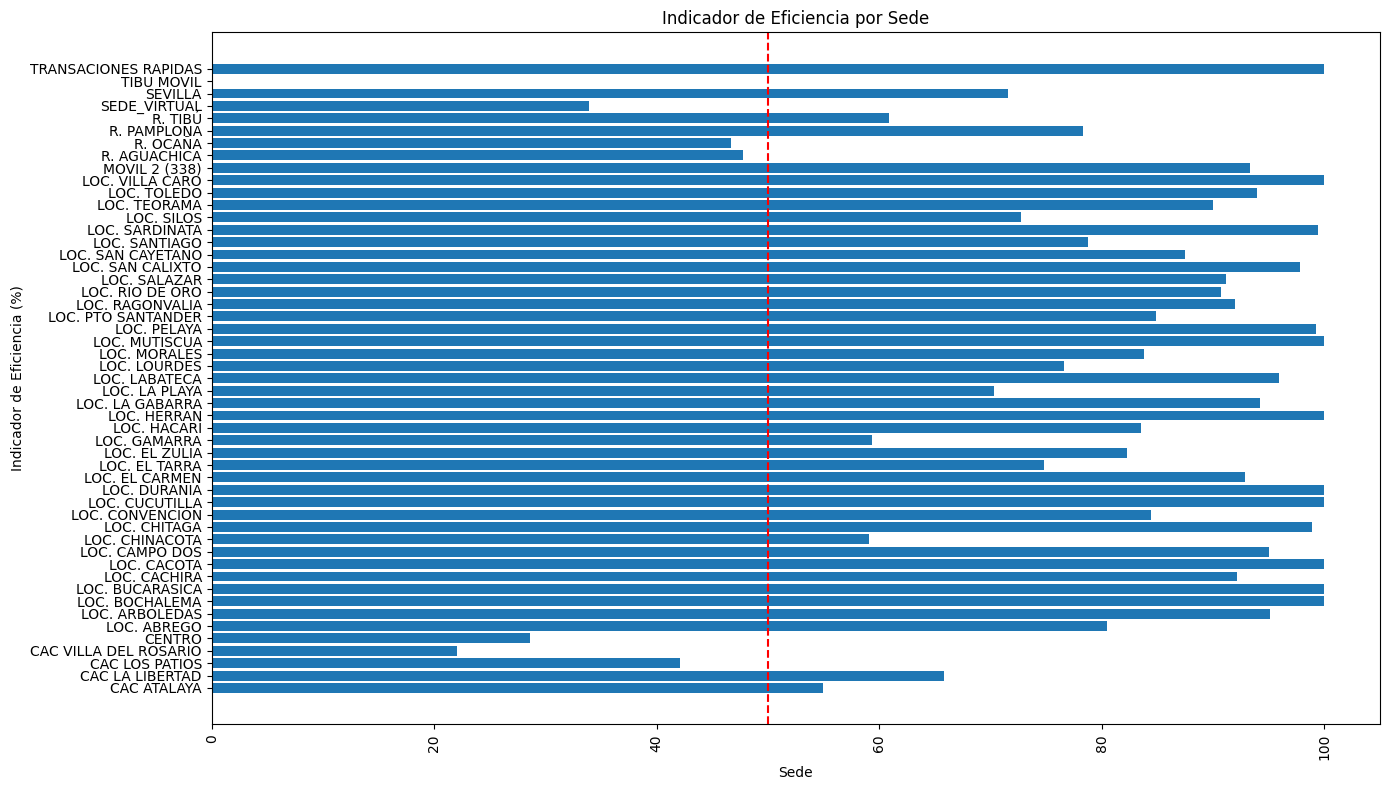

In [35]:
df_resultados = pd.DataFrame(list(resultados.items()), columns=['Sede', 'Indicador'])
# Generar la gráfica de barras
plt.figure(figsize=(14, 8))
plt.barh(df_resultados['Sede'], df_resultados['Indicador'])
plt.xlabel('Sede')
plt.ylabel('Indicador de Eficiencia (%)')
plt.title('Indicador de Eficiencia por Sede')
plt.axvline(x=50, color='r', linestyle='--')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

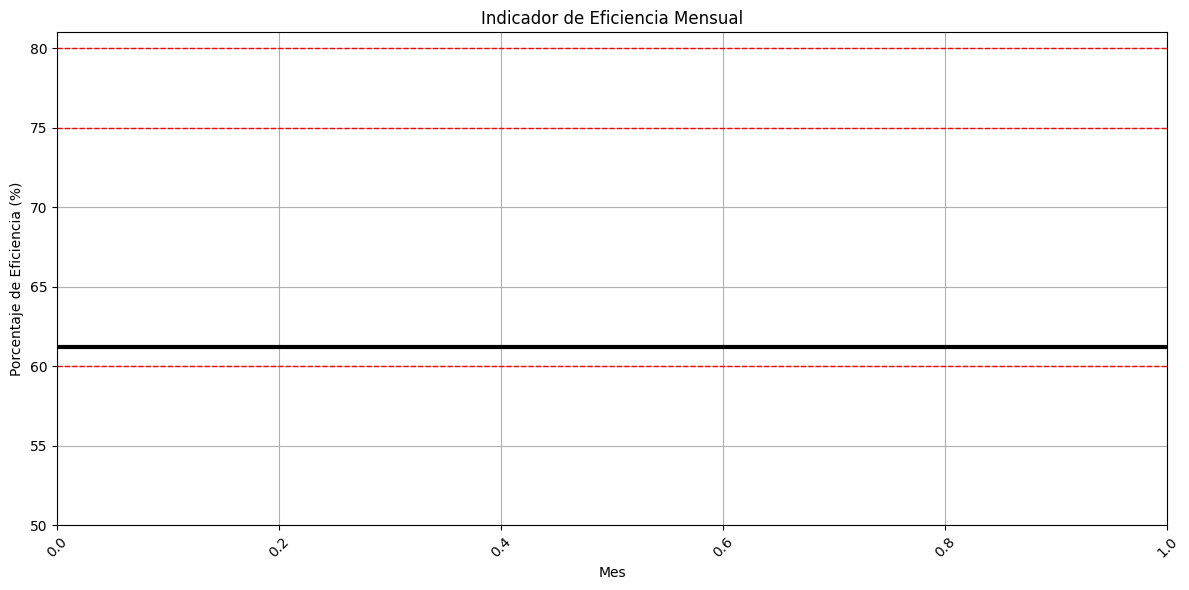

In [36]:
# Crear un gráfico de líneas para visualizar la eficiencia mes a mes
plt.figure(figsize=(12, 6))

plt.title('Indicador de Eficiencia Mensual')
plt.xlabel('Mes')
plt.ylabel('Porcentaje de Eficiencia (%)')
# Líneas horizontales en y = 60, 75 y 80
plt.axhline(y=60, color='red', linestyle='--', linewidth=1)
plt.axhline(y=75, color='red', linestyle='--', linewidth=1)
plt.axhline(y=80, color='red', linestyle='--', linewidth=1)
plt.axhline(y=indicador_total, color='black', linewidth=3)
plt.ylim(50)
plt.xticks(rotation=45)

plt.grid(True)
plt.tight_layout()
plt.show()

##Propuesta 2

In [37]:
# Definir los umbrales según la cantidad de turnos esperando
sedes_a_evaluar = list(data_procesada['Sede'].unique())

umbrales = {
    'grupo_1_P': {'baja': 15, 'alta': 20},
    'localidades': 15,
    'Sevilla_P': {'baja': 20, 'alta': 25},
    'grupo_1_NP': {'baja': 20, 'alta': 25},
    'Sevilla_NP': {'baja': 25, 'alta': 30},
    'Transacciones_Rapidas': 10,
    'Virtual_Tramites': {'baja': 20, 'alta': 25},
    'Virtual_Constructor': {'baja': 45, 'alta': 60},
    'Gramalote': 10
}

condicion_arribos = {
    'grupo_1': {'baja': 19, 'alta': 39},
    'grupo_2': {'baja': 9, 'alta': 19},
    'grupo_3': {'baja': 7, 'alta': 18},
    'grupo_4': {'baja': 5, 'alta': 10}
}

def determinar_umbral(grupo, sede, tipo, turnos_esperando):
    if grupo == 'Transacciones_Rapidas':
        return umbrales['Transacciones_Rapidas']
    elif grupo == 'Gramalote':
        return umbrales['Gramalote']
    if grupo in 'localidades':
        return umbrales['localidades']

    if grupo == 'Sevilla_NP' or grupo == 'Sevilla_P':
        if turnos_esperando < 20:
            return umbrales[grupo]['baja']
        elif turnos_esperando <= 39:
            return umbrales[grupo]['alta']
        else:
            return float('inf')  # Excepción, no cuenta para el umbral

    if grupo == 'Virtual_Constructor' or grupo == 'Virtual_Tramites':
        if turnos_esperando < 10:
            return umbrales[grupo]['baja']
        elif turnos_esperando <= 19:
            return umbrales[grupo]['alta']
        else:
            return float('inf')  # Excepción, no cuenta para el umbral

    grupo_arribos = None
    if sede in grupo_1_arribos:
        grupo_arribos = 'grupo_1'
    elif sede in grupo_2_arribos:
        grupo_arribos = 'grupo_2'
    elif sede in grupo_3_arribos:
        grupo_arribos = 'grupo_3'
    elif sede in grupo_4_arribos:
        grupo_arribos = 'grupo_4'

    if grupo_arribos:
        if turnos_esperando <= condicion_arribos[grupo_arribos]['baja']:
            return umbrales[grupo]['baja']
        elif turnos_esperando <= condicion_arribos[grupo_arribos]['alta']:
            return umbrales[grupo]['alta']
        else:
            return float('inf')  # Excepción, no cuenta para el umbral

    return float('inf')  # Si no encuentra la condición adecuada, lo considera una excepción

# Contadores de excepciones
excepciones_contador = 0

# Inicializar el contador total de turnos debajo del umbral y total de turnos
total_turnos_debajo_umbral = 0
total_turnos_mes = 0

# Crear un diccionario para almacenar los resultados
resultados = {}

for sede in sedes_a_evaluar:
    data_a_evaluar = data_procesada[data_procesada['Sede'] == sede]
    turnos_sede = len(data_a_evaluar)
    turnos_debajo_umbral = 0
    turnos_fuera_umbral = 0

    if turnos_sede == 0:  # Evitar la división por cero
        continue

    for turno in data_a_evaluar['IdTurno'].unique():  # Solo turnos únicos en el mes actual
        turno_a_evaluar = data_a_evaluar[data_a_evaluar['IdTurno'] == turno]
        grupo_turno = turno_a_evaluar['Clasificacion_P2'].iloc[0]  # Obtiene el grupo del turno
        sede_turno = turno_a_evaluar['Sede'].iloc[0]  # Obtiene la sede del turno
        tiempo_de_espera = turno_a_evaluar['Tiempo de espera'].iloc[0]  # Obtiene el tiempo de espera del turno
        turnos_esperando = turno_a_evaluar['Turnos_Esperando'].iloc[0]  # Obtiene los turnos esperando

        umbral = determinar_umbral(grupo_turno, sede_turno, grupo_turno, turnos_esperando)

        if umbral == float('inf'):
            excepciones_contador += 1
        elif tiempo_de_espera <= umbral:
            turnos_debajo_umbral += 1
        else:
            turnos_fuera_umbral += 1

    indicador = (turnos_debajo_umbral / turnos_sede) * 100
    total_turnos_debajo_umbral += turnos_debajo_umbral
    total_turnos_mes += turnos_sede
    resultados[sede] = indicador
    print(f'El indicador de eficiencia en la sede {sede} resultó en {indicador}%')

# Calcular el indicador total
indicador_total2 = (total_turnos_debajo_umbral / total_turnos_mes) * 100
print(f'El indicador total de eficiencia resultó en {indicador_total2}%')
print(f'Total de excepciones: {excepciones_contador}')

El indicador de eficiencia en la sede CAC ATALAYA resultó en 54.92227979274611%
El indicador de eficiencia en la sede CAC LA LIBERTAD resultó en 71.06314948041566%
El indicador de eficiencia en la sede CAC LOS PATIOS resultó en 49.544072948328264%
El indicador de eficiencia en la sede CAC VILLA DEL ROSARIO resultó en 26.268241834607366%
El indicador de eficiencia en la sede CENTRO resultó en 33.11913000494315%
El indicador de eficiencia en la sede LOC. ABREGO resultó en 80.45685279187818%
El indicador de eficiencia en la sede LOC. ARBOLEDAS resultó en 95.1219512195122%
El indicador de eficiencia en la sede LOC. BOCHALEMA resultó en 100.0%
El indicador de eficiencia en la sede LOC. BUCARASICA resultó en 100.0%
El indicador de eficiencia en la sede LOC. CACHIRA resultó en 92.17391304347827%
El indicador de eficiencia en la sede LOC. CACOTA resultó en 100.0%
El indicador de eficiencia en la sede LOC. CAMPO DOS resultó en 95.0%
El indicador de eficiencia en la sede LOC. CHINACOTA resultó e

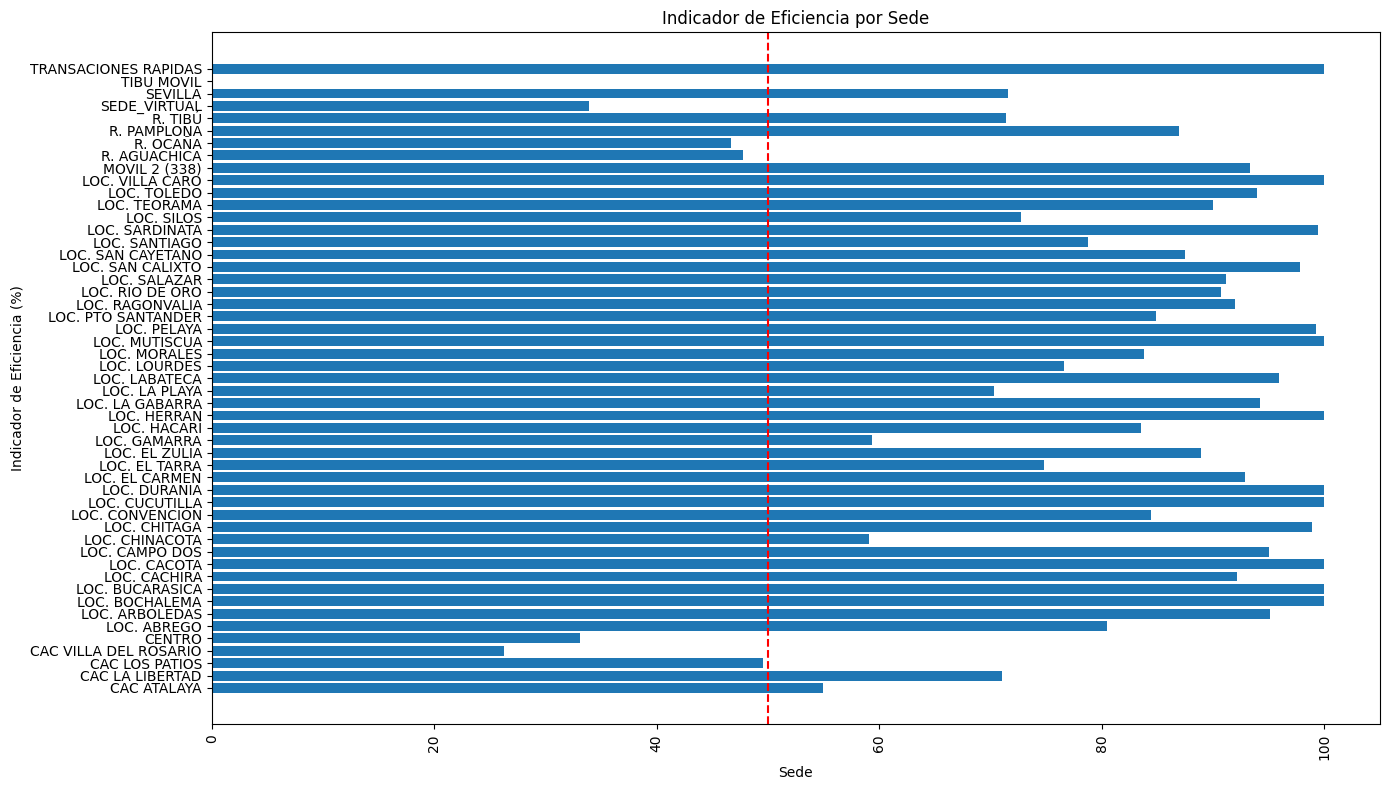

In [38]:
df_resultados = pd.DataFrame(list(resultados.items()), columns=['Sede', 'Indicador'])
# Generar la gráfica de barras
plt.figure(figsize=(14, 8))
plt.barh(df_resultados['Sede'], df_resultados['Indicador'])
plt.xlabel('Sede')
plt.ylabel('Indicador de Eficiencia (%)')
plt.title('Indicador de Eficiencia por Sede')
plt.axvline(x=50, color='r', linestyle='--')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

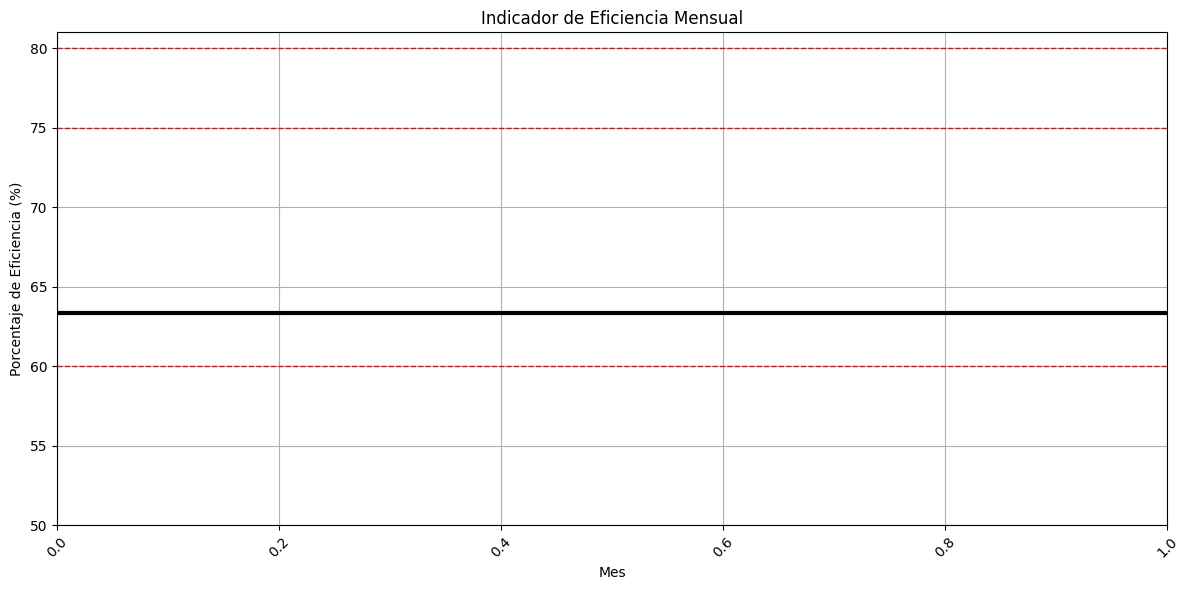

In [39]:
# Crear un gráfico de líneas para visualizar la eficiencia mes a mes
plt.figure(figsize=(12, 6))

plt.title('Indicador de Eficiencia Mensual')
plt.xlabel('Mes')
plt.ylabel('Porcentaje de Eficiencia (%)')
# Líneas horizontales en y = 60, 75 y 80
plt.axhline(y=60, color='red', linestyle='--', linewidth=1)
plt.axhline(y=75, color='red', linestyle='--', linewidth=1)
plt.axhline(y=80, color='red', linestyle='--', linewidth=1)
plt.axhline(y=indicador_total2, color='black', linewidth=3)
plt.ylim(50)
plt.xticks(rotation=45)

plt.grid(True)
plt.tight_layout()
plt.show()

##Comportamiento historico

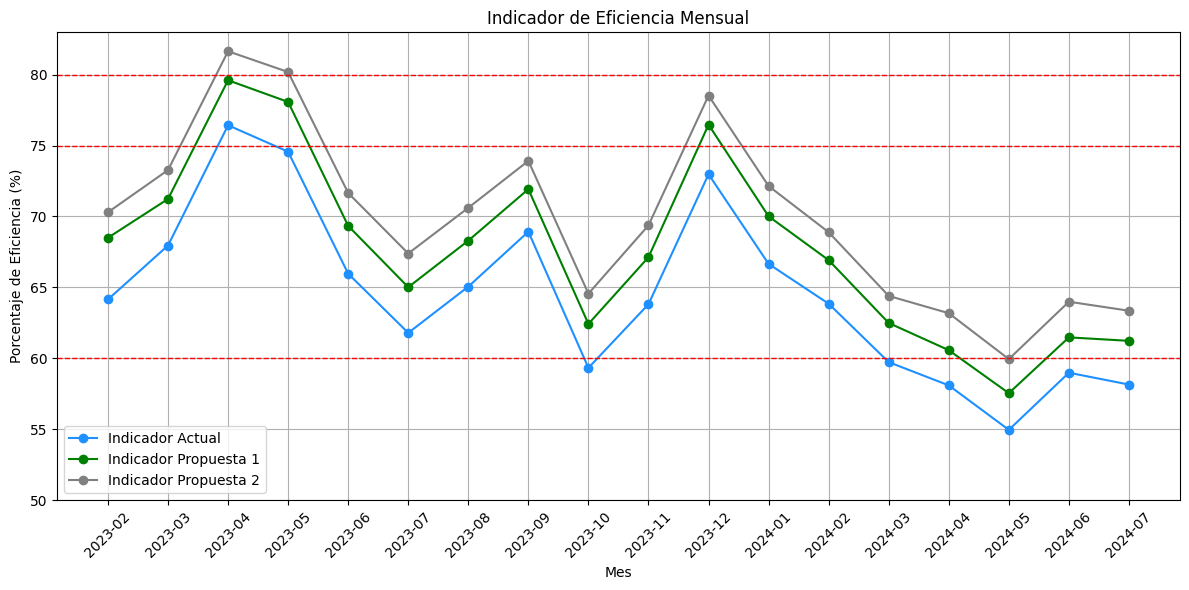

In [43]:
# Meses y porcentajes de los indicadores de eficiencia
meses = [
    "2023-02", "2023-03", "2023-04", "2023-05", "2023-06",
    "2023-07", "2023-08", "2023-09", "2023-10", "2023-11",
    "2023-12", "2024-01", "2024-02", "2024-03", "2024-04",
    "2024-05", "2024-06", "2024-07"
]

porcentajes_eficiencia = [64.14580681657475, 67.95118022427359, 76.43049672699269, 74.56394433599898, 65.96285373658782,
    61.790814357390964, 65.0503701905571, 68.92727797185988, 59.322911609541386, 63.81040707495611,
    72.97482754884611, 66.65449121845798, 63.8458251953125, 59.72718651980451, 58.08829857425629, 54.950993862782816, 58.980249622822654,
    58.1453634085213]

porcentajes_propuesta_1 = [
    68.49809079338142,
    71.23164611858002,
    79.6033885252214,
    78.0744285624331,
    69.33550856497459,
    65.01029203653673,
    68.29408908848161,
    71.92397679561553,
    62.42029970547303,
    67.12596469146435,
    76.47080067896998,
    70.0088271999513,
    66.9189453125,
    62.48814647311984,
    60.56928065191817,
    57.53840548910073,
    61.47304896447675,
    61.22837213515717
]

porcentajes_propuesta_2 = [
    70.29415924197426,
    73.26993370918778,
    81.64805544859453,
    80.18386751464014,
    71.65401267490745,
    67.38710922423775,
    70.60929724481126,
    73.92070766962597,
    64.5564294268052,
    69.3716670530953,
    78.52576835566471,
    72.14561836057591,
    68.8873291015625,
    64.39565249106425,
    63.177527187168224,
    59.93988706053798,
    63.98642161569058,
    63.351148956729176
]

# Crear un gráfico de líneas para visualizar la eficiencia mes a mes
plt.figure(figsize=(12, 6))
plt.plot(meses, porcentajes_eficiencia, marker='o', linestyle='-', color='dodgerblue', label='Indicador Actual')
plt.plot(meses, porcentajes_propuesta_1, marker='o', linestyle='-', color='green', label='Indicador Propuesta 1')
plt.plot(meses, porcentajes_propuesta_2, marker='o', linestyle='-', color='gray', label='Indicador Propuesta 2')



plt.title('Indicador de Eficiencia Mensual')
plt.xlabel('Mes')
plt.ylabel('Porcentaje de Eficiencia (%)')
# Líneas horizontales en y = 60, 75 y 80
plt.axhline(y=60, color='red', linestyle='--', linewidth=1)
plt.axhline(y=75, color='red', linestyle='--', linewidth=1)
plt.axhline(y=80, color='red', linestyle='--', linewidth=1)
plt.ylim(50)
plt.legend()
plt.xticks(rotation=45)

plt.grid(True)
plt.tight_layout()
plt.show()

#Indicador Eficacia

In [41]:
#Turnos abandonados
print(data_procesada['Abandonado'].value_counts())
total_turnos = len(data_procesada)
atendidos = len(data_procesada[data_procesada['Abandonado']=='NO'])
print(total_turnos)
print(f'El indicador de eficacia para el mes evaluado corresponde a: {np.around((atendidos/total_turnos)*100,2)}%')

Abandonado
NO    31530
SI     1587
Name: count, dtype: int64
33117
El indicador de eficacia para el mes evaluado corresponde a: 95.21%


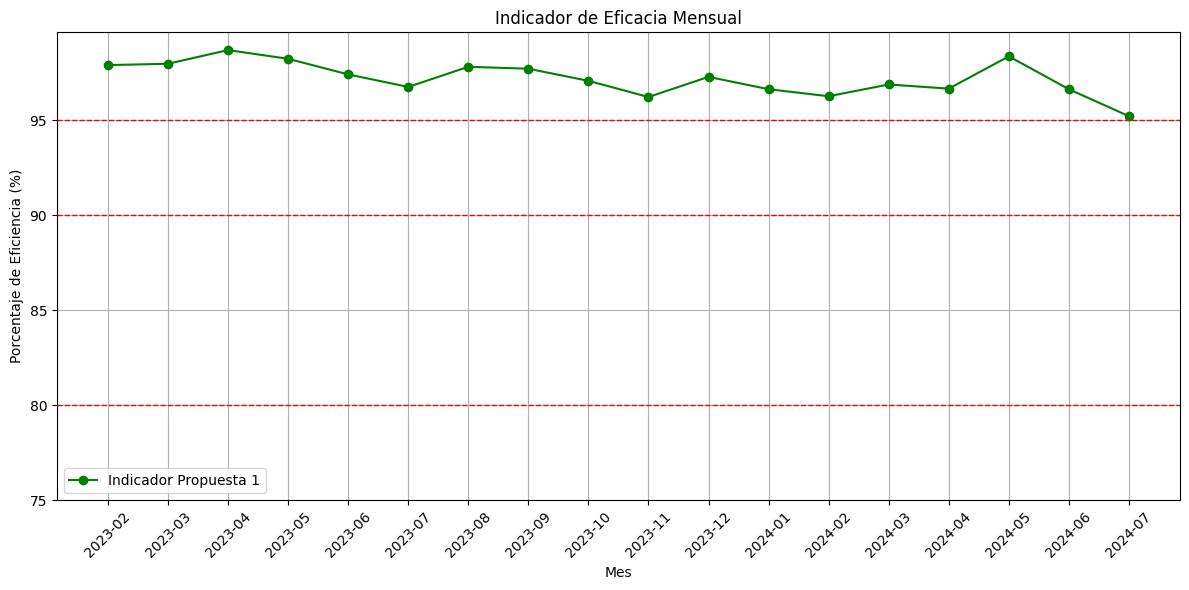

In [44]:
# Meses y porcentajes de los indicadores de eficiencia
meses = [
    "2023-02", "2023-03", "2023-04", "2023-05", "2023-06",
    "2023-07", "2023-08", "2023-09", "2023-10", "2023-11",
    "2023-12", "2024-01", "2024-02", "2024-03", "2024-04",
    "2024-05", "2024-06", "2024-07"
]

porcentajes_eficacia = [97.9, 97.97, 98.69, 98.23, 97.41, 96.75, 97.81, 97.71, 97.07, 96.22, 97.28, 96.63, 96.26, 96.88, 96.66,
                        98.36, 96.63, 95.21]


# Crear un gráfico de líneas para visualizar la eficiencia mes a mes
plt.figure(figsize=(12, 6))
plt.plot(meses, porcentajes_eficacia, marker='o', linestyle='-', color='green', label='Indicador Propuesta 1')
plt.title('Indicador de Eficacia Mensual')
plt.xlabel('Mes')
plt.ylabel('Porcentaje de Eficiencia (%)')
# Líneas horizontales en y = 60, 75 y 80
plt.axhline(y=90, color='red', linestyle='--', linewidth=1)
plt.axhline(y=95, color='red', linestyle='--', linewidth=1)
plt.axhline(y=80, color='red', linestyle='--', linewidth=1)
plt.ylim(75)
plt.legend()
plt.xticks(rotation=45)

plt.grid(True)
plt.tight_layout()
plt.show()